## ICA

Check out this code for <a href="http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py">ICA</a>

## Revisiting PCA and moving on to clustering

### Loading standardized datasets from Sklearn

Let's work with the cancer data set from Sklearn since it has many features.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [5]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### PCA 
This data set makes it clear that we cannot just visualize all features in one single plot. Even for downstream analysis, when you have so many dimensions (30), the curse of the dimensionality would require us to use a TON of samples. But we don't have that. So we will first use PCA to reduce the dimensionality of the data. 

We will first scale our data so that each feature has a single unit variance. Scaling can also be done directly by using the `whiten=True` option when running PCA but I am showing this below so you know a general way to scale data

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_data = scaler.transform(df)

We will keep enough components so as to retain 90% of the variance of the data

In [11]:
pca = PCA(n_components=0.9)

In [12]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its principal component subspace.

In [25]:
transformed_data = pca.transform(scaled_data)

In [14]:
scaled_data.shape

(569L, 30L)

In [26]:
transformed_data.shape

(569L, 7L)

Great! We've reduced 30 dimensions to just 7! Let's plot the first two dimensions!

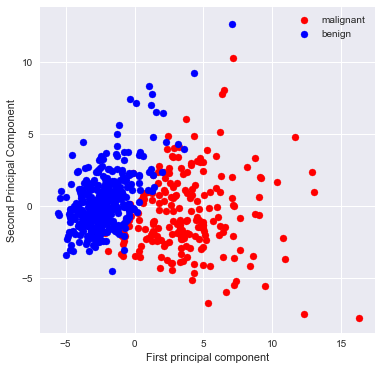

In [37]:
plt.figure(figsize=(6,6))
colors = ['r', 'b']
for target in np.sort(np.unique(cancer['target'])):
    idx = cancer['target']==target
    plt.scatter(transformed_data[idx,0],transformed_data[idx,1],c=colors[target],label=cancer['target_names'][target])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend()

Clearly by using these two components we can easily separate these two classes.

### Interpreting the components 

The components are linear combinations of the original features. Remember the mental picture of rotating the coordinate axes to fit most variance of the data?

In [22]:
pca.components_.shape

(7L, 30L)

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [23]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

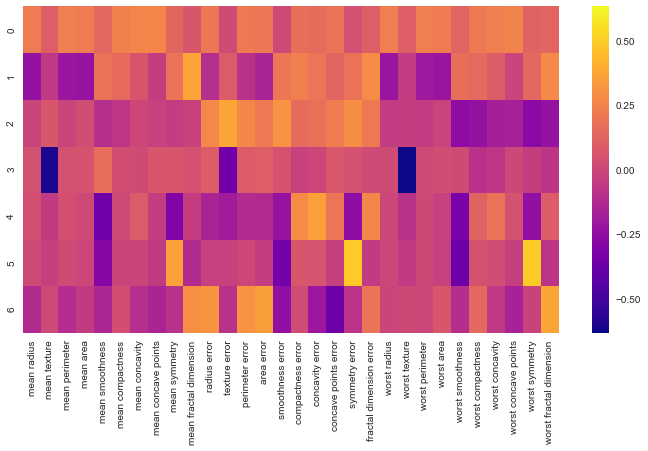

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

## Clustering

Now we are ready to do some clustering on this data set. I am choosing this data set because even though clustering is unsupervised, we can use the clustered results themselves to test against whether the clusters represent bening or malignant tumors. 

Note that the clustering is NOT classification. We are not training an algorithm to classify the data into the two kinds of tumors. We are simply checking whether there is any structure in the data and if so, using this structure to check if the resultant clusters actually correspond to the two kinds of tumors

In [33]:
from sklearn.cluster import KMeans

In [34]:
clusters = KMeans(n_clusters=2)

# Fit model to our selected features.
clusters.fit(transformed_data)

# Put centroids and results into variables.
centroids = clusters.cluster_centers_
labels = clusters.labels_

# Sanity check
print(centroids)

[[ -2.18497103e+00   1.86857113e-02   8.79668913e-02   3.49038140e-02
    2.18076162e-04  -5.78439428e-03   2.16260963e-02]
 [  4.39306344e+00  -3.75691550e-02  -1.76864649e-01  -7.01769804e-02
   -4.38460007e-04   1.16299991e-02  -4.34810401e-02]]


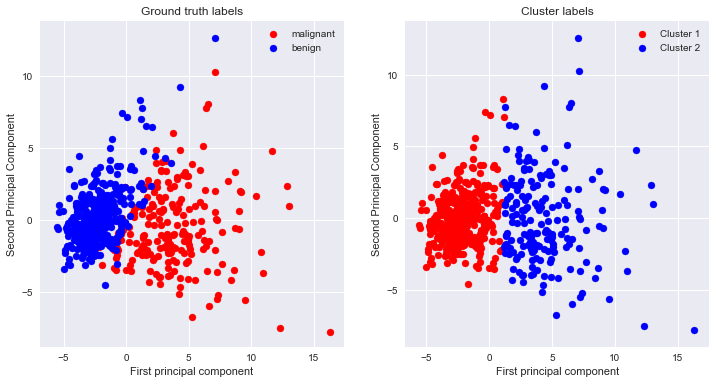

In [42]:
fig, axs = plt.subplots(1,2,figsize=(12,6))
colors = ['r', 'b']
titles = ['Ground truth labels', 'Cluster labels']
label_options = [[cancer['target'], cancer['target_names']], [labels, ['Cluster 1', 'Cluster 2']]]
for l, label_option in enumerate(label_options):
    for target in np.sort(np.unique(label_option[0])):
        idx = label_option[0]==target
        axs[l].scatter(transformed_data[idx,0],transformed_data[idx,1],c=colors[target],label=label_option[1][target])

    axs[l].set_title(titles[l])
    axs[l].set_xlabel('First principal component')
    axs[l].set_ylabel('Second Principal Component')
    axs[l].legend()

Calculate the match between the clusters found and the type of tumor

In [54]:
np.sum((cancer['target']-np.logical_not(labels).astype(int))==0)/(labels.size+0.)

0.91036906854130051

There is a big problem with this whole approach, however. We started with the knowledge of how many clusters there should be. What if you don't know how many clusters there should be?

This is actually a very tricky <a href="https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set">problem</a>. This is also why clustering specifically, and unsupervised algorithms generally, are subject to a lot of interpretive room. Generally, you should not make strong claims based on clustering. It's mostly meant to be a guide for subsequent decision-making, rather than an exact quantification.

There are two general classes of solutions for this problem.
1. Calculation of validity based on some ground truth labeling
1. Completely unsupervised metrics of "clusteredness" that tell you how clustered the clusters are

The first class of solutions is inherently problematic as we often don't have ground truth data. The data I chose here, the breast cancer data, is an exception. But in pretty much most problems you have, you will not know how many clusters the data fall into

So what do you do then? One approach, going back to the philosophy of prediction, is to cross-validate the number of clusters. The basic idea is to vary the number of clusters and for each number, calculate some metric of stability of clustering and the pick the number that maximizes the stability.

How do you calculate stability? The approach is like this:
1. Split your data into different sets, say half and half.
1. Calculate clusters based on part of the data and then check if clusters calculated from the remaining part of the data "matches" the first set of clusters.
1. A metric of matching could be mean distance between corresponding clusters, for instance.
1. The number of clusters that minimizes the mean distance will then be the appropriate number of clusters to choose.

I won't show you a code for this, but I hope you guys can write your own if you would like to use it. 

The most common approach in the second class is to use a score called <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html">"silhouette score"</a>. 

> The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

Given such a score, the solution to finding the number of clusters is to simply try a whole bunch of them and pick the one that maximizes the silhouette score

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

('For n_clusters =', 2, 'The average silhouette_score is :', 0.37082188634198371)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.33759584882328519)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.29968887469504096)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.19269914542007777)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.18974910797247821)


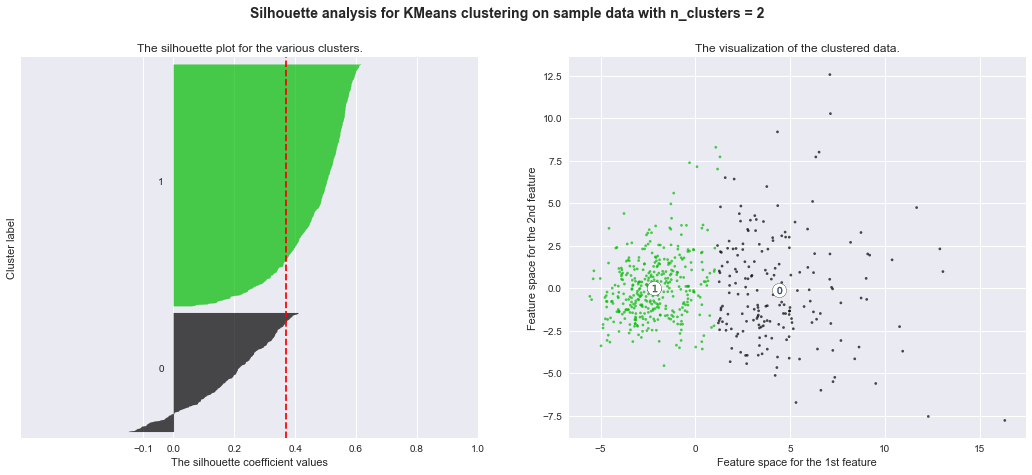

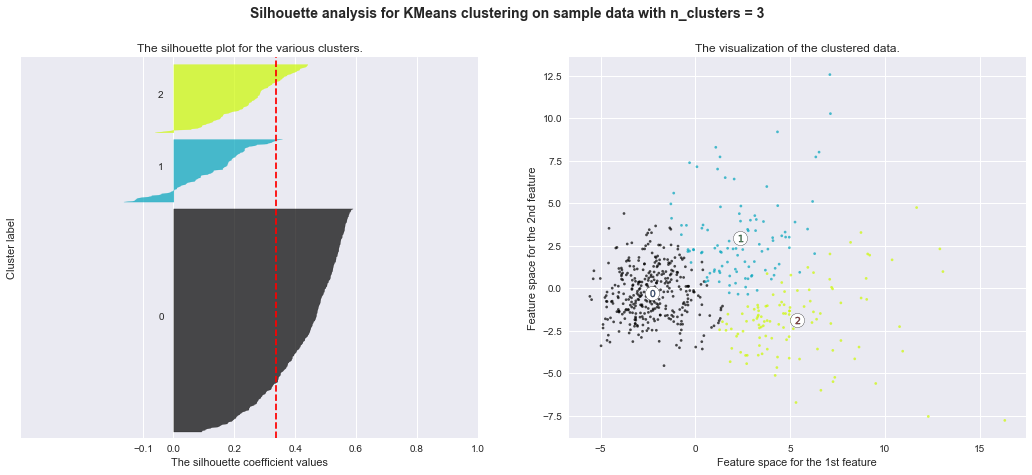

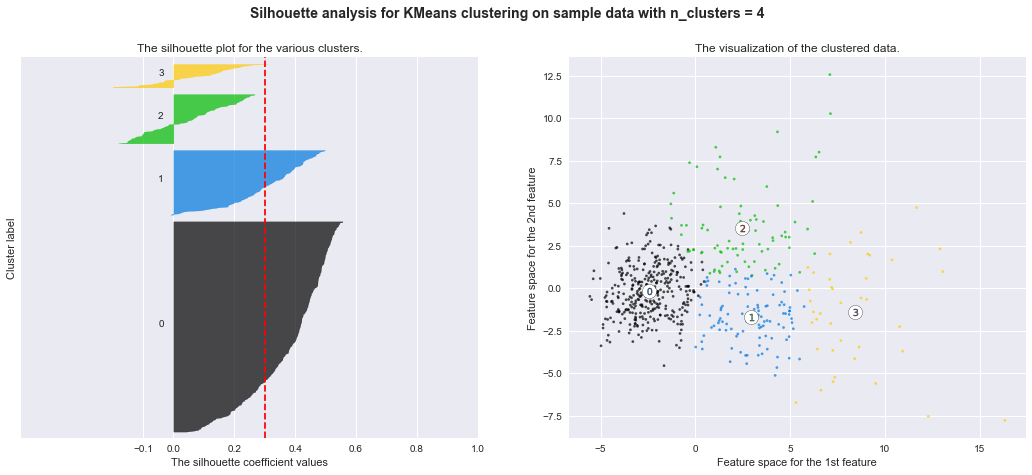

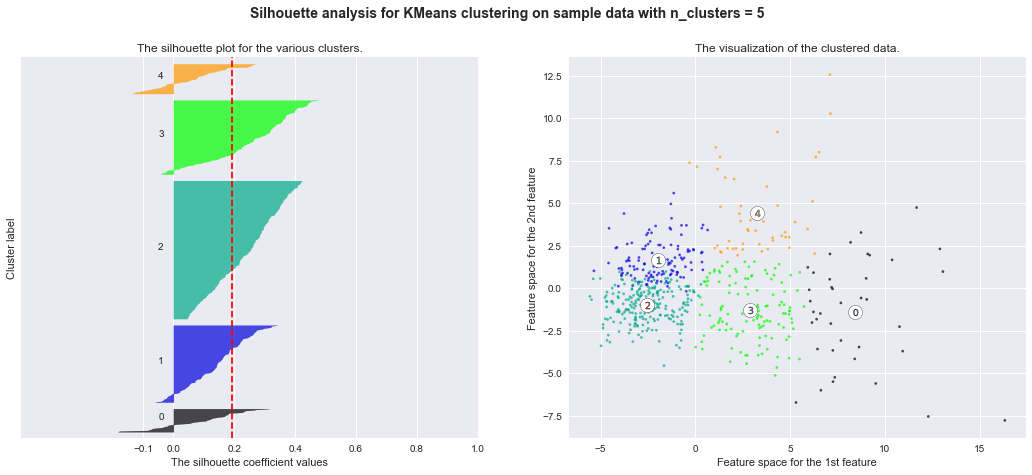

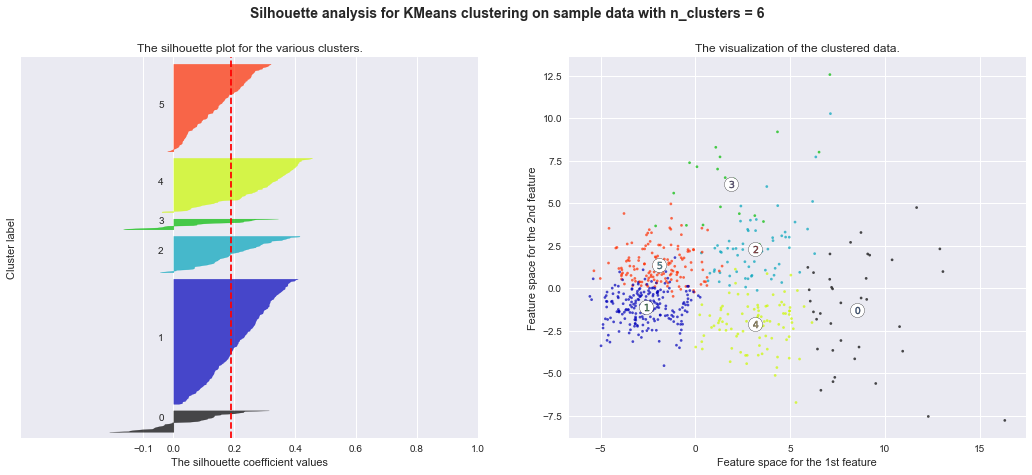

In [69]:
range_n_clusters = [2, 3, 4, 5, 6]
metric = 'euclidean'

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(transformed_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(transformed_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(transformed_data, cluster_labels, metric=metric)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(transformed_data, cluster_labels, metric=metric)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(transformed_data[:, 0], transformed_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

One potential problem with the silhouette score is that if your clusters are not convex, the distances might not really be a good measure of whether a datum belongs to one or another cluster

## Other methods for clustering

http://scikit-learn.org/stable/modules/clustering.html